In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.exposure import histogram

<AxesSubplot:>

<Figure size 5120x3840 with 0 Axes>

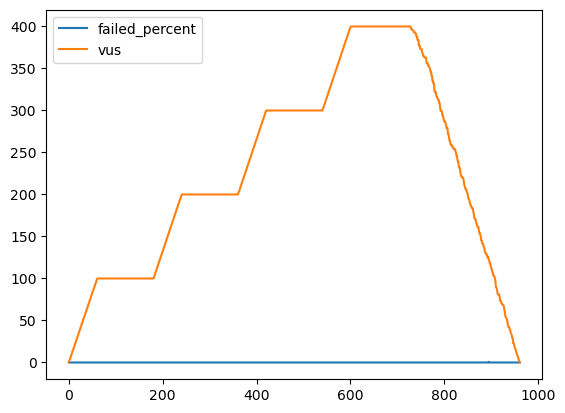

In [74]:
csv_file_name = "summary.csv"
data = pd.read_csv(csv_file_name)

http_reqs = data[data.metric_name == 'http_reqs'] 
http_req_failed = data[data.metric_name == 'http_req_failed']
vus = data[data.metric_name == 'vus']


min_time = data['timestamp'].min()
max_time = data['timestamp'].max()



#print(min_time)
#print(max_time)
#print(http_reqs)

outcome = pd.DataFrame(columns=['failed_percent', 'vus'])


for time in range(min_time, max_time + 1):
    reqs = len(http_reqs[http_reqs.timestamp == time])
    failed_reqs = len(http_req_failed[(http_req_failed.timestamp == time) & (http_req_failed.expected_response == False)])
    failed_percent = 0.0
    if reqs != 0:
        failed_percent = round(failed_reqs / reqs * 100, 2) 
    vu = vus[vus.timestamp == time].metric_value.tolist()
    vu_real = 0
    if len(vu) != 0:
        vu_real = int(vu[0])
    #print(time - min_time, failed_percent, vu_real)
    row = [failed_percent, vu_real]
    outcome.loc[len(outcome)] = row
    
plt.figure(dpi = 800)
outcome.plot()

#print(outcome)

C:\Users\oskar\AppData\Local\Temp\ipykernel_17964\787042391.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file_name)


<AxesSubplot:>

<Figure size 5120x3840 with 0 Axes>

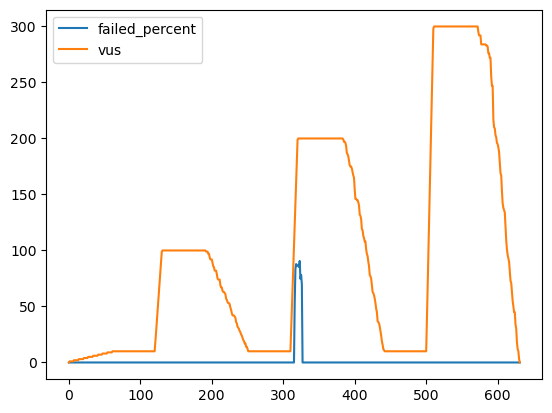

In [71]:
csv_file_name = "summary_spike.csv"
data = pd.read_csv(csv_file_name)

http_reqs = data[data.metric_name == 'http_reqs'] 
http_req_failed = data[data.metric_name == 'http_req_failed']
vus = data[data.metric_name == 'vus']


min_time = data['timestamp'].min()
max_time = data['timestamp'].max()



#print(min_time)
#print(max_time)
#print(http_reqs)

outcome = pd.DataFrame(columns=['failed_percent', 'vus'])


for time in range(min_time, max_time + 1):
    reqs = len(http_reqs[http_reqs.timestamp == time])
    failed_reqs = len(http_req_failed[(http_req_failed.timestamp == time) & (http_req_failed.expected_response == False)])
    failed_percent = 0.0
    if reqs != 0:
        failed_percent = round(failed_reqs / reqs * 100, 2) 
    vu = vus[vus.timestamp == time].metric_value.tolist()
    vu_real = 0
    if len(vu) != 0:
        vu_real = int(vu[0])
    #print(time - min_time, failed_percent, vu_real)
    row = [failed_percent, vu_real]
    outcome.loc[len(outcome)] = row
    
plt.figure(dpi = 800)
outcome.plot()

#print(outcome)